In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import os
!pip install kaggle --upgrade
os.environ['KAGGLE_USERNAME'] = "abhinavbenagi"
os.environ['KAGGLE_KEY'] ="cde11f9eaaace985599fb6de8dca1e79"
!kaggle datasets download -d gpreda/pfizer-vaccine-tweets


pfizer-vaccine-tweets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/pfizer-vaccine-tweets.zip

Archive:  /content/pfizer-vaccine-tweets.zip
replace vaccination_tweets.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: vaccination_tweets.csv  


In [ ]:
df = pd.read_csv('/content/pfizer-vaccine-tweets.zip')
df.head()

id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eliüá±üáπüá™üá∫üëå                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra üñê‚ò∫  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   

                  date                                               text  \
0  2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
1  2020-12-13 16:27:13  While the world has been on the wrong side of ...   
2  2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3  2020-12-12 20:23:59  Facts are immutable, Senator, even when you're...   
4  2020-12-12 20:17:19  Explain to me again why we need a vaccine @Bor...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                NaN      Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                NaN      Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   

   retweets  favorites  is_retweet  
0         0          0       False  
1         1          1       False  
2         0          0       False  
3       446       2129       False  
4         0          0       False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10341 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [ ]:
df.isnull().sum()

id                     0
user_name              0
user_location       2270
user_description     679
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [ ]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [ ]:
df= df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],axis =1)

df.head()

text
0  Same folks said daikon paste could treat a cyt...
1  While the world has been on the wrong side of ...
2  #coronavirus #SputnikV #AstraZeneca #PfizerBio...
3  Facts are immutable, Senator, even when you're...
4  Explain to me again why we need a vaccine @Bor...

In [ ]:
print(df['text'].iloc[0],"\n")
print(df['text'].iloc[1],"\n")
print(df['text'].iloc[2],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev‚Ä¶ https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years‚Ä¶ https://t.co/ieYlCKBr8P 



In [ ]:
print(df['text'].iloc[0],"\n")
print(df['text'].iloc[1],"\n")
print(df['text'].iloc[2],"\n")

In [ ]:
df.info()

In [ ]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [ ]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df["text"] = df['text'].apply(data_processing)

In [ ]:
df=df.drop_duplicates('text')

In [ ]:
#Stemming is a text normalization technique used in
#natural language processing and information retrieval to reduce words
#to their base or root form.
stemmer=PorterStemmer()
def stemming(data):
  text= [stemmer.stem(word) for word in data]
  return data

In [ ]:
df["text"] = df['text'].apply(lambda x: stemming(x))

In [ ]:
df.head()

text
0  folks said daikon paste could treat cytokine s...
1  world wrong side history year hopefully bigges...
2  coronavirus sputnikv astrazeneca pfizerbiontec...
3  facts immutable senator even youre ethically s...
4  explain need vaccine borisjohnson matthancock ...

In [ ]:
print(df['text'].iloc[0],"\n")
print(df['text'].iloc[1],"\n")
print(df['text'].iloc[2],"\n")

folks said daikon paste could treat cytokine storm pfizerbiontech 

world wrong side history year hopefully biggest vaccination effort weve ev 

coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years 



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10543 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10543 non-null  object
dtypes: object(1)
memory usage: 164.7+ KB


In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
df['polarity'] = df['text'].apply(polarity)
df.head(10)

text  polarity
0  folks said daikon paste could treat cytokine s...     0.000
1  world wrong side history year hopefully bigges...    -0.500
2  coronavirus sputnikv astrazeneca pfizerbiontec...     0.000
3  facts immutable senator even youre ethically s...     0.100
4  explain need vaccine borisjohnson matthancock ...     0.000
5  anyone useful adviceguidance whether covid vac...     0.400
6  bit sad claim fame success vaccination patriot...    -0.100
7  many bright days 2020 best 1 bidenharris winni...     0.675
8  covid vaccine getting covidvaccine covid19 pfi...     0.000
9  covidvaccine states start getting covid19vacci...     0.000

In [ ]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [ ]:
df['sentiment'] = df['polarity'].apply(sentiment)

In [ ]:
df

text  polarity sentiment
0      folks said daikon paste could treat cytokine s...  0.000000   Neutral
1      world wrong side history year hopefully bigges... -0.500000  Negative
2      coronavirus sputnikv astrazeneca pfizerbiontec...  0.000000   Neutral
3      facts immutable senator even youre ethically s...  0.100000  Positive
4      explain need vaccine borisjohnson matthancock ...  0.000000   Neutral
...                                                  ...       ...       ...
11014  ruvanw gmalavige chandi2012 already 3rd pfizer...  0.000000   Neutral
11015  number covid19 cases today 17 november 2021 re...  0.000000   Neutral
11017  number covid19 cases today 16 november 2021 re...  0.000000   Neutral
11018  pfizerbiontech developed new pill paxlovid inc... -0.121212  Negative
11019  number covid19 cases today 15 november 2021 re...  0.000000   Neutral

[10543 rows x 3 columns]

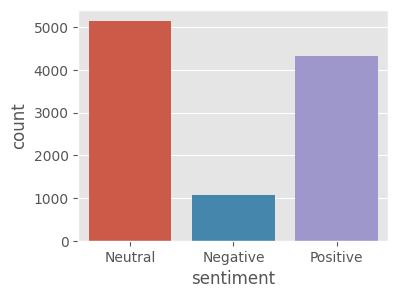

In [ ]:
plt.figure(figsize=(4,3))

# Create a countplot for the 'sentiment' column
sns.countplot(x="sentiment", data=df)

# Show the plot
plt.show()

In [ ]:
#Checking Positive, Neutral & Negative Words
positive = df[df["sentiment"] == 'Positive']
neutral = df[df["sentiment"] == 'Neutral']
negative = df[df["sentiment"] == 'Negative']

In [ ]:
positive.shape, neutral.shape, negative.shape


((4317, 3), (5151, 3), (1075, 3))

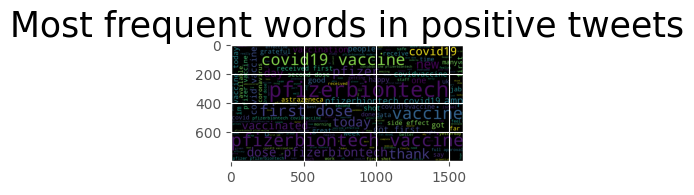

In [ ]:
words = ' '.join([word for word in positive['text']])
plt.figure(figsize=(3,2), facecolor='None')
wordcloud = WordCloud(max_words=200, width=1600, height=800).generate(words)
plt.imshow(wordcloud)
plt.title('Most frequent words in positive tweets', fontsize=25)
plt.show()

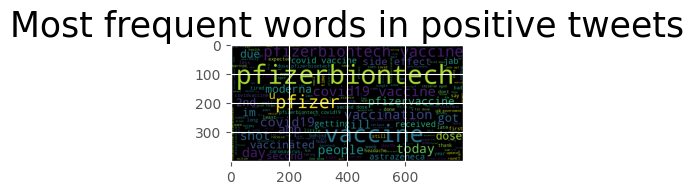

In [ ]:
#Negative words
words = ' '.join([word for word in negative['text']])
plt.figure(figsize=(3,2), facecolor='None')
wordcloud = WordCloud(max_words=200, width=800, height=400).generate(words)
plt.imshow(wordcloud)
plt.title('Most frequent words in positive tweets', fontsize=25)
plt.show()

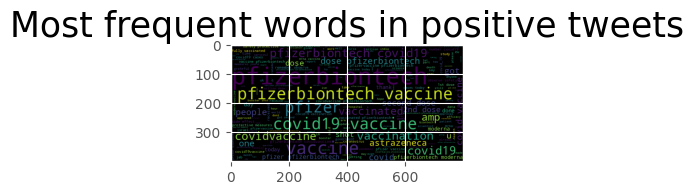

In [ ]:
#Neutral words
words = ' '.join([word for word in neutral['text']])
plt.figure(figsize=(3,2), facecolor='None')
wordcloud = WordCloud(max_words=200, width=800, height=400).generate(words)
plt.imshow(wordcloud)
plt.title('Most frequent words in positive tweets', fontsize=25)
plt.show()

In [ ]:
X = df['text']
y = df['sentiment']

In [ ]:
vec = CountVectorizer()
X = vec.fit_transform(X)

In [ ]:
X

<10543x16792 sparse matrix of type '<class 'numpy.int64'>'
	with 102083 stored elements in Compressed Sparse Row format>

In [ ]:
df['text']

0        folks said daikon paste could treat cytokine s...
1        world wrong side history year hopefully bigges...
2        coronavirus sputnikv astrazeneca pfizerbiontec...
3        facts immutable senator even youre ethically s...
4        explain need vaccine borisjohnson matthancock ...
                               ...                        
11014    ruvanw gmalavige chandi2012 already 3rd pfizer...
11015    number covid19 cases today 17 november 2021 re...
11017    number covid19 cases today 16 november 2021 re...
11018    pfizerbiontech developed new pill paxlovid inc...
11019    number covid19 cases today 15 november 2021 re...
Name: text, Length: 10543, dtype: object

In [ ]:
#train test split of dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(x_test.shape)

(2109, 16792)


#Regression model

In [ ]:
logreg= LogisticRegression()
logreg.fit(x_train,y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc =accuracy_score(logreg_pred, y_test)
print("test accuracy: {: .2f}%".format(logreg_acc*100))

test accuracy:  88.62%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(confusion_matrix(y_test, logreg_pred))
print('\n')
print(classification_report(y_test, logreg_pred))

[[  90   94   29]
 [   4 1028   10]
 [  16   87  751]]


              precision    recall  f1-score   support

    Negative       0.82      0.42      0.56       213
     Neutral       0.85      0.99      0.91      1042
    Positive       0.95      0.88      0.91       854

    accuracy                           0.89      2109
   macro avg       0.87      0.76      0.79      2109
weighted avg       0.89      0.89      0.88      2109



#Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C':[0.001, 0.01, 0.1 , 1 ,10]}
grid = GridSearchCV(LogisticRegression(), param_grid)

grid.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
best_params = grid.best_params_
best_model = grid.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)


Best Hyperparameters: {'C': 10}
Best Model: LogisticRegression(C=10)


In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("test accuracy: {: .2f}%".format(logreg_acc*100))

test accuracy:  90.28%


In [ ]:
print(confusion_matrix(y_test, logreg_pred))
print('\n')
print(classification_report(y_test, logreg_pred))

[[  90   94   29]
 [   4 1028   10]
 [  16   87  751]]


              precision    recall  f1-score   support

    Negative       0.82      0.42      0.56       213
     Neutral       0.85      0.99      0.91      1042
    Positive       0.95      0.88      0.91       854

    accuracy                           0.89      2109
   macro avg       0.87      0.76      0.79      2109
weighted avg       0.89      0.89      0.88      2109



#SVM

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train ,y_train)

LinearSVC()

In [ ]:

SVC_pred = SVCmodel.predict(x_test)
SVC_acc =accuracy_score(SVC_pred, y_test)
print("test accuracy: {: .2f}%".format(SVC_acc*100))

test accuracy:  91.94%


In [ ]:
print(confusion_matrix(y_test, SVC_pred))
print('\n')
print(classification_report(y_test, SVC_pred))

[[ 128   61   24]
 [  10 1022   10]
 [  20   45  789]]


              precision    recall  f1-score   support

    Negative       0.81      0.60      0.69       213
     Neutral       0.91      0.98      0.94      1042
    Positive       0.96      0.92      0.94       854

    accuracy                           0.92      2109
   macro avg       0.89      0.84      0.86      2109
weighted avg       0.92      0.92      0.92      2109



# hYPER Parameter for svm

In [ ]:
param_grid = {
    'C':[0.01, 0.1,1,10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel ,param_grid)
grid.fit(x_train, y_train)

ValueError: ignored

In [ ]:
param_grid = {
    'C':[0.01, 0.1,1,10]
}
grid = GridSearchCV(SVCmodel ,param_grid)
grid.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.01, 0.1, 1, 10]})

In [ ]:
best_params = grid.best_params_
best_model = grid.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)


Best Hyperparameters: {'C': 1}
Best Model: LinearSVC(C=1)


In [ ]:
y_pred = grid.predict(x_test)
SVC_acc = accuracy_score(y_pred, y_test)
print("test accuracy: {: .2f}%".format(SVC_acc*100))

test accuracy:  91.94%


In [ ]:
print(confusion_matrix(y_test, SVC_pred))
print('\n')
print(classification_report(y_test, SVC_pred))

[[ 128   61   24]
 [  10 1022   10]
 [  20   45  789]]


              precision    recall  f1-score   support

    Negative       0.81      0.60      0.69       213
     Neutral       0.91      0.98      0.94      1042
    Positive       0.96      0.92      0.94       854

    accuracy                           0.92      2109
   macro avg       0.89      0.84      0.86      2109
weighted avg       0.92      0.92      0.92      2109



SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
y_train = y_train.to_numpy()
le = LabelEncoder()
y_train = le.fit_transform(y_train)



In [ ]:
y_train

array([1, 2, 2, ..., 0, 1, 1])

In [ ]:
svm = SVC(kernel='rbf')
model = svm.fit(x_train, y_train)
ypred = svm.predict(x_test)

In [ ]:
ypred

array([1, 1, 1, ..., 2, 2, 1])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, multilabel_confusion_matrix


In [ ]:
y_test = le.fit_transform(y_test.to_numpy())

In [ ]:
y_test

array([1, 1, 1, ..., 2, 2, 1])

In [ ]:
accuracy_score(ypred, y_test)

0.8283546704599336

In [ ]:
multilabel_confusion_matrix(ypred, y_test)

array([[[1891,  178],
        [   5,   35]],

       [[ 758,    8],
        [ 309, 1034]],

       [[1207,  176],
        [  48,  678]]])

In [ ]:
f1_score(ypred, y_test, average="weighted")

0.8528388086562866

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
param_grid = {
    'C':[0.1, 1],
    'kernel':["linear","poly","rbf"],
    'degree':[1,3],
    'gamma':[0.01, 0.1, 0.1]
}
grid = RandomizedSearchCV(svm, param_grid, scoring="accuracy", n_iter=2 )
grid.fit(x_train, y_train)

RandomizedSearchCV(estimator=SVC(), n_iter=2,
                   param_distributions={'C': [0.1, 1], 'degree': [1, 3],
                                        'gamma': [0.01, 0.1, 0.1],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   scoring='accuracy')

In [ ]:
grid.best_params_

{'kernel': 'linear', 'gamma': 0.1, 'degree': 3, 'C': 1}

In [ ]:
grid.best_index_

0

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('vectorizer', vec),('classifier',svm)])
np.unique(le.inverse_transform([0,1,2]))


array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [ ]:
query = ["I sad "]
result = pipe.predict(query)
print(result)

[1]
